In [ ]:
!unzip /content/Liman-engine-defect-detection-master.zip
!cd Liman-engine-defect-detection-master; mv * .[^.]* ..

Archive:  /content/Liman-engine-defect-detection-master.zip
6b3f04bd0704b6512ff01ff0906baa12c6bb5877
   creating: Liman-engine-defect-detection-master/
  inflating: Liman-engine-defect-detection-master/.gitattributes  
 extracting: Liman-engine-defect-detection-master/.gitignore  
  inflating: Liman-engine-defect-detection-master/EDA.ipynb  
  inflating: Liman-engine-defect-detection-master/README.md  
   creating: Liman-engine-defect-detection-master/data/
  inflating: Liman-engine-defect-detection-master/data/0702  межвитковые фазы A ток фазы А.txt  
  inflating: Liman-engine-defect-detection-master/data/0702  перекос фазы A ток фазы А.txt  
  inflating: Liman-engine-defect-detection-master/data/0702 без перекосов фаза A.txt  
  inflating: Liman-engine-defect-detection-master/data/20_01_1460_об_мин_с_дисбалансом_ротора.txt  
  inflating: Liman-engine-defect-detection-master/data/ВКЛ-ВЫКЛ нагрузка 100% 11 01.txt  
  inflating: Liman-engine-defect-detection-master/data/нагрузка 100% 11

In [ ]:
!pip install noisereduce -q

In [2]:
import json
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
args = SimpleNamespace(**{
    'threshold': 0.4, # Signal detection threshold
    'max_peak_distance_Hz': 0.5,
    'cut_freq_Hz': 200, # Cut all frequencies above the value
    'reduce_noise': False # Reduce noise from the original signal
})

Перекос фазы А ток фазы А - значение 1

In [ ]:
filename = '/content/data/0702  перекос фазы A ток фазы А.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

In [ ]:
df['anomaly0'] = 1
df['anomaly1'] = 1


In [ ]:
big_dataset = df
window_size = 250
num_datasets = 200
datasets = [big_dataset[i:i+window_size] for i in range(0, len(big_dataset), window_size)][:num_datasets]

# Шаг 3 и 4: Преобразовать каждый датасет в CSV и сохранить их в одну папку
output_folder = '/content/newdata_perekos11'
os.makedirs(output_folder, exist_ok=True)

for i, dataset in enumerate(datasets):
    dataset.to_csv(os.path.join(output_folder, f'dataset_1_{i}.csv'), index=False)

# Архивировать папку с CSV файлами
!zip -r /content/newdata_perekos11.zip /content/newdata_perekos11

# Скачать архив с CSV файлами
from google.colab import files
files.download("/content/newdata_perekos11.zip")

Холостой ход

In [ ]:
filename = '/content/data/холостой ход 11 01.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

In [ ]:
df['anomaly0'] = 1
df['anomaly1'] = 0

In [ ]:
big_dataset = df
window_size = 250
num_datasets = 200
datasets = [big_dataset[i:i+window_size] for i in range(0, len(big_dataset), window_size)][:num_datasets]

# Шаг 3 и 4: Преобразовать каждый датасет в CSV и сохранить их в одну папку
output_folder = 'newdata_holost'
os.makedirs(output_folder, exist_ok=True)

for i, dataset in enumerate(datasets):
    dataset.to_csv(os.path.join(output_folder, f'dataset_2_{i}.csv'), index=False)

# Архивировать папку с CSV файлами
!zip -r /content/newdata_holost.zip /content/newdata_holost

# Скачать архив с CSV файлами
from google.colab import files
files.download("/content/newdata_holost.zip")

In [ ]:
filename = '/content/data/0702 без перекосов фаза A.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]


In [ ]:
df['anomaly0'] = 0
df['anomaly1'] = 0


In [ ]:
big_dataset = df.drop(['time'], axis=1)
window_size = 250
num_datasets = 200
for j in range(10):
    datasets[j] = [big_dataset[i:i+window_size] for i in range(50*j, len(big_dataset), window_size)][:num_datasets]
    datatranspose[j] = []
    for df in datasets[j]:
        datatranspose[j].append(df.transpose())
    for df in datatranspose[j]:
        df.columns = [i for i in range(250)]


In [ ]:
for j in range(10):
    output_folder = f'/content/nnorm_{j}'
    os.makedirs(output_folder, exist_ok=True)

    for i, dataset in enumerate(datatranspose[j]):
        dataset.to_csv(os.path.join(output_folder, f'dataset_0_{i}.csv'), index=False)

In [ ]:
for j in range(10):
    path_to_data = f'/content/nnorm_{j}'

    all_files[j]=[]
    for root, dirs, files in os.walk(path_to_data):
        for file in files:
            if file.endswith(".csv"):
                all_files[j].append(os.path.join(root, file))




In [ ]:
for j in range(10):
    listtt[j] = [pd.read_csv(file,
                        sep=',',
                        parse_dates=True) for file in all_files[j]]


In [ ]:
for j in range(10):
    output_folder = '/content/DataL_'
    os.makedirs(output_folder, exist_ok=True)
    pd.concat(listtt[j]).to_csv(os.path.join(output_folder, f'data_{j}.csv'), index=False)

In [ ]:
!zip -r /content/DataL.zip /content/DataL_

from google.colab import files
files.download("/content/DataL.zip")

  adding: content/DataL_/ (stored 0%)
  adding: content/DataL_/data_6.csv (deflated 87%)
  adding: content/DataL_/data_8.csv (deflated 87%)
  adding: content/DataL_/data_2.csv (deflated 87%)
  adding: content/DataL_/data_3.csv (deflated 87%)
  adding: content/DataL_/data_5.csv (deflated 87%)
  adding: content/DataL_/data_7.csv (deflated 87%)
  adding: content/DataL_/data_4.csv (deflated 87%)
  adding: content/DataL_/data_9.csv (deflated 87%)
  adding: content/DataL_/data_1.csv (deflated 87%)
  adding: content/DataL_/data_0.csv (deflated 87%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filename = '/content/data/0702  перекос фазы A ток фазы А.txt'
df = data.read(filename)
if args.reduce_noise:
    df.value = nr.reduce_noise(df.value, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = data.time_to_freq_transform(df)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]


In [ ]:
datatranspose = []
for df in datasets[0]:
    datatranspose.append(df.transpose())
for df in datatranspose[0]:
    df.columns = [i for i in range(250)]

In [ ]:
window_size = 250
num_datasets = 200
datasets = []
datasets = [big_dataset[i:i+window_size] for i in range(0, len(big_dataset), window_size)][50:num_datasets+50:1]
datasets

datatranspose = []
for df in datasets:
    datatranspose.append(df.transpose())

for df in datatranspose:
        df.columns = [i for i in range(250)]

datatranspose

In [ ]:
#big_dataset = df.drop(['time'], axis=1)
window_size = 250
num_datasets = 200
for j in range(10):
    datasets[j] = [big_dataset[i:i+window_size] for i in range(0, len(big_dataset), window_size)][10*j:num_datasets+10*j:1])

    datatranspose[j] = []
    for df in datasets[j]:
        datatranspose[j].append(df.transpose())
    for df in datatranspose[j]:
        df.columns = [i for i in range(250)]


In [ ]:
for j in range(10):
    output_folder = f'/content/anom_{j}'
    os.makedirs(output_folder, exist_ok=True)

    for i, dataset in enumerate(datatranspose[j]):
        dataset.to_csv(os.path.join(output_folder, f'dataset_0_{i}.csv'), index=False)

In [ ]:
path_to_data = f'/content/anom_0'

all_files=[]
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
            all_files.append(os.path.join(root, file))


In [ ]:
for j in range(10):
    path_to_data = f'/content/anom_{j}'

    all_files[j]=[]
    for root, dirs, files in os.walk(path_to_data):
        for file in files:
            if file.endswith(".csv"):
                all_files[j].append(os.path.join(root, file))




In [ ]:
listtt = [pd.read_csv(file,
                        sep=',',
                        parse_dates=True) for file in all_files[0]]


In [ ]:
for j in range(10):
    listtt[j] = [pd.read_csv(file,
                        sep=',',
                        parse_dates=True) for file in all_files[j]]


In [ ]:
pd.concat(listtt[3])

In [ ]:
for j in range(10):
    output_folder = '/content/anomDataL'
    os.makedirs(output_folder, exist_ok=True)
    pd.concat(listtt[j]).to_csv(os.path.join(output_folder, f'data_{j}.csv'), index=False)

In [ ]:
!zip -r /content/anomDataL.zip /content/anomDataL

from google.colab import files
files.download("/content/anomDataL.zip")

updating: content/anomDataL/ (stored 0%)
updating: content/anomDataL/data_6.csv (deflated 80%)
updating: content/anomDataL/data_8.csv (deflated 80%)
updating: content/anomDataL/data_2.csv (deflated 80%)
updating: content/anomDataL/data_3.csv (deflated 80%)
updating: content/anomDataL/data_5.csv (deflated 80%)
updating: content/anomDataL/data_7.csv (deflated 80%)
updating: content/anomDataL/data_4.csv (deflated 80%)
updating: content/anomDataL/data_9.csv (deflated 80%)
updating: content/anomDataL/data_1.csv (deflated 80%)
updating: content/anomDataL/data_0.csv (deflated 80%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
path_to_data = '/content/good_data_for_conv'
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))
list0 = [pd.read_csv(file,
                          sep=',',
                          parse_dates=True) for file in all_files]

#Преобразование Фурье


In [ ]:
def time_to_freq_transform(df, f_sampling, db=True):
    """
    @param df: pd.DataFrame - spectrum data
    @param config: dict - engine config
    @param db: bool - convert to decibel scale if True
    @param reduce_noise: bool - reduce noise if True
    """
    y = df['Amplitude']
    n = len(y)
    yf = np.fft.rfft(y)
    fstep = f_sampling / n
    freqs = np.arange(len(yf)) * fstep
    if db:
        yf = 20*np.log10(np.abs(yf))
    return yf, freqs

In [ ]:
df = list0[0]
if args.reduce_noise:
    df.Amplitude = nr.reduce_noise(df.Amplitude, int(config['f_sampling']), freq_mask_smooth_hz=args.cut_freq_Hz)
yf, freqs = time_to_freq_transform(df, f_sampling = 1000)
mask = freqs < args.cut_freq_Hz
freqs, yf = [x[mask] for x in [freqs, yf]]

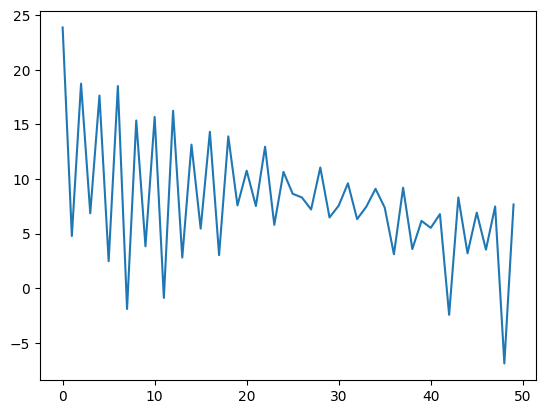

In [ ]:
plt.plot(yf)

In [ ]:
def create_anomaly(df, column_name, mean, std, anomaly_ratio):
    df_anomaly = df.copy()
    anomaly_indices = np.random.choice(df.index, size=int(len(df) * anomaly_ratio), replace=False)
    anomalies = np.random.normal(loc=mean, scale=std, size=len(anomaly_indices))
    df_anomaly.loc[anomaly_indices, column_name] = anomalies

    return df_anomaly


In [ ]:
yf = pd.DataFrame(data = yf, columns = ['Amplitude'])
yf.describe()

,Amplitude
count,2000.000000
mean,55.253821
std,7.537337
min,20.605777
25%,51.235249
50%,55.417458
75%,58.978931
max,118.375887


In [ ]:
def create_anomaly(df, start_idx, end_idx, mean, std):
    anomaly = np.random.normal(mean, std, end_idx - start_idx + 1)
    df.loc[start_idx:end_idx, 'anomaly'] = anomaly
    return df

In [ ]:
df_anomaly = create_anomaly(yf, 100, 150, yf.Amplitude.mean() + 10, yf.Amplitude.std() + 7)

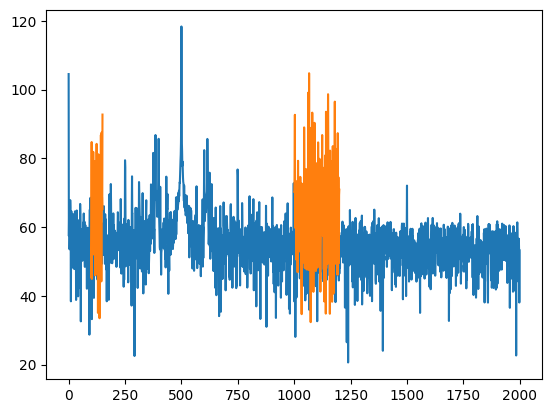

In [ ]:
plt.plot(df_anomaly)

In [ ]:
df_anomaly = create_anomaly(list0[0], 'Amplitude', list0[0].Amplitude.mean() + 0.5, list0[0].Amplitude.std() + 0.1, 0.1 )

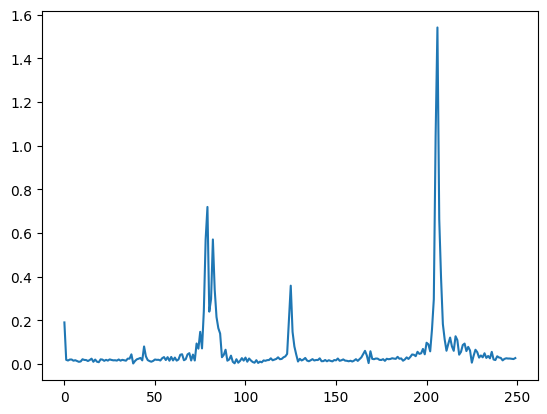

In [ ]:
plt.plot(list0[0])

In [ ]:
list0[0]

,Amplitude
0,0.190774
1,0.019464
2,0.016258
3,0.020847
4,0.020911
...,...
245,0.025366
246,0.025382
247,0.024132
248,0.022979


In [ ]:
list0[0].Amplitude.std()

0.14705463217718745

In [ ]:
df_anomaly = create_anomaly(list0[0], 'Amplitude', list0[0].Amplitude.mean() + 0.5, list0[0].Amplitude.std() + 0.1, 0.1 )

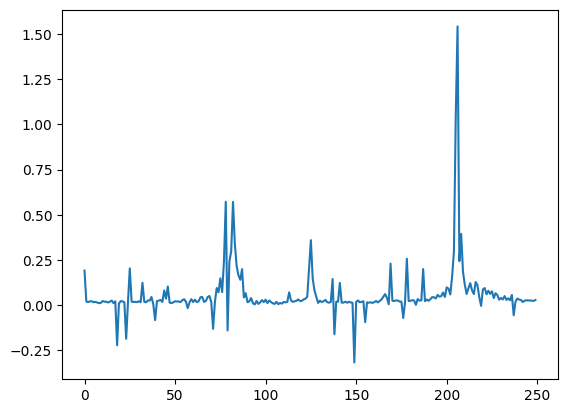

In [ ]:
plt.plot(df_anomaly)

In [ ]:
df_anomaly

In [ ]:
df_anomaly = []
for i in range(200):
    df_anomaly.append(create_anomaly(list0[i], 'Amplitude', list0[0].Amplitude.mean() + 0.5, list0[0].Amplitude.std() + 0.1, 0.1 ))


In [ ]:
output_folder = '/content/df_anomaly'
os.makedirs(output_folder, exist_ok=True)

for i, dataset in enumerate(df_anomaly):
    dataset.to_csv(os.path.join(output_folder, f'dataset_{i}.csv'), index=False)

# Архивировать папку с CSV файлами
!zip -r /content/df_anomaly.zip /content/df_anomaly

# Скачать архив с CSV файлами
from google.colab import files
files.download("/content/df_anomaly.zip")

In [3]:
!unzip /content/spectra_json.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: spectra_json/2023_06_07T21:44:37_2_A.json  
  inflating: spectra_json/2023_06_07T22:34:37_2_A.json  
  inflating: spectra_json/2023_06_07T23:34:37_2_A.json  
  inflating: spectra_json/2023_06_08T00:44:37_2_A.json  
  inflating: spectra_json/2023_06_08T02:44:37_2_A.json  
  inflating: spectra_json/2023_06_08T04:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T05:44:37_2_A.json  
  inflating: spectra_json/2023_06_08T07:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T08:54:37_2_A.json  
  inflating: spectra_json/2023_06_08T09:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T11:34:37_2_A.json  
  inflating: spectra_json/2023_06_08T13:34:37_2_A.json  
  inflating: spectra_json/2023_06_08T14:54:37_2_A.json  
  inflating: spectra_json/2023_06_08T15:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T16:54:37_2_A.json  
  inflating: spectra_json/2023_06_08T18:04:37_2_A.json  
  inflating: spectra

In [ ]:
path_to_data = '/content/good_data_for_conv'
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [2]:
!unzip /content/spectra_json.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: spectra_json/2023_06_07T21:44:37_2_A.json  
  inflating: spectra_json/2023_06_07T22:34:37_2_A.json  
  inflating: spectra_json/2023_06_07T23:34:37_2_A.json  
  inflating: spectra_json/2023_06_08T00:44:37_2_A.json  
  inflating: spectra_json/2023_06_08T02:44:37_2_A.json  
  inflating: spectra_json/2023_06_08T04:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T05:44:37_2_A.json  
  inflating: spectra_json/2023_06_08T07:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T08:54:37_2_A.json  
  inflating: spectra_json/2023_06_08T09:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T11:34:37_2_A.json  
  inflating: spectra_json/2023_06_08T13:34:37_2_A.json  
  inflating: spectra_json/2023_06_08T14:54:37_2_A.json  
  inflating: spectra_json/2023_06_08T15:24:37_2_A.json  
  inflating: spectra_json/2023_06_08T16:54:37_2_A.json  
  inflating: spectra_json/2023_06_08T18:04:37_2_A.json  
  inflating: spectra

In [1]:
!unzip /content/spectra_without_anomaly_only_A.zip

Archive:  /content/spectra_without_anomaly_only_A.zip
   creating: content/spectra_without_anomaly_only_A/
  inflating: content/spectra_without_anomaly_only_A/dataframe_75.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_98.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_43.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_74.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_58.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_49.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_26.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_20.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_54.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_31.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_76.csv  
  inflating: content/spectra_without_anomaly_only_A/dataframe_42.csv  
  inflating: content/spectra_without_anom

In [5]:
import zipfile
import json
import pandas as pd


In [3]:
#path_to_data = '/content/spectra_json'
path_to_data = '/content/spectra_json'
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".json"):
        #if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [4]:
all_files = sorted(all_files)

In [5]:
len(all_files)

9064

In [8]:
print(all_files[0], '\n', all_files[1])

/content/spectra_json/2023_06_04T00:14:37_2_A.json 
 /content/spectra_json/2023_06_04T00:14:37_2_B.json


In [ ]:
def time_to_freq_transform(df, f_sampling, db=True):
    """
    @param df: pd.DataFrame - spectrum data
    @param config: dict - engine config
    @param db: bool - convert to decibel scale if True
    @param reduce_noise: bool - reduce noise if True
    """
    y = df[1]
    n = len(y)
    yf = np.fft.rfft(y)
    fstep = f_sampling / n
    freqs = np.arange(len(yf)) * fstep
    if db:
        yf = 20*np.log10(np.abs(yf))
    return yf, freqs

In [6]:
arr_without = []
for i in range(0, 4500, 9):
    if all_files[i].endswith("B.json") and all_files[i + 3].endswith("B.json") and all_files[i + 6].endswith("B.json"):
        data_0 = json.load(open(all_files[i]))
        data_1 = json.load(open(all_files[i + 3]))
        data_2 = json.load(open(all_files[i + 6]))
        print('start\n', all_files[i], '\n', all_files[i+3], '\n', all_files[i+6], 'end')

        array_data_0 = data_0['spectrum_chart']
        array_data_0 = pd.DataFrame(array_data_0)
        array_data_0 = array_data_0.drop(index = 0)
        array_data_0 = array_data_0.drop([0], axis = 1)
        #array_data_0, freq = time_to_freq_transform(array_data_0, f_sampling = 1000) #преобразование Фурье

        array_data_1 = data_1['spectrum_chart']
        array_data_1 = pd.DataFrame(array_data_1)
        array_data_1 = array_data_1.drop(index = 0)
        array_data_1 = array_data_1.drop([0], axis = 1)
        #array_data_1, freq = time_to_freq_transform(array_data_1, f_sampling = 1000) # и здесь

        array_data_2 = data_2['spectrum_chart']
        array_data_2 = pd.DataFrame(array_data_2)
        array_data_2 = array_data_2.drop(index = 0)
        array_data_2 = array_data_2.drop([0], axis = 1)
        #array_data_2, freq = time_to_freq_transform(array_data_2, f_sampling = 1000) # и тут

        ans_data = pd.DataFrame()
        ans_data['A'] = array_data_0
        ans_data['B'] = array_data_1
        ans_data['C'] = array_data_2

        arr_without.append(ans_data)







start
 /content/spectra_json/2023_06_04T09:34:37_2_B.json 
 /content/spectra_json/2023_06_04T09:44:37_2_B.json 
 /content/spectra_json/2023_06_04T09:54:37_2_B.json end
start
 /content/spectra_json/2023_06_04T10:04:37_2_B.json 
 /content/spectra_json/2023_06_04T10:14:37_2_B.json 
 /content/spectra_json/2023_06_04T10:24:37_2_B.json end
start
 /content/spectra_json/2023_06_04T10:34:37_2_B.json 
 /content/spectra_json/2023_06_04T10:44:37_2_B.json 
 /content/spectra_json/2023_06_04T10:54:37_2_B.json end
start
 /content/spectra_json/2023_06_04T23:54:37_2_B.json 
 /content/spectra_json/2023_06_05T00:01:03_3_B.json 
 /content/spectra_json/2023_06_05T00:04:37_2_B.json end
start
 /content/spectra_json/2023_06_05T00:11:03_3_B.json 
 /content/spectra_json/2023_06_05T00:14:37_2_B.json 
 /content/spectra_json/2023_06_05T00:21:03_3_B.json end
start
 /content/spectra_json/2023_06_05T00:24:37_2_B.json 
 /content/spectra_json/2023_06_05T00:31:03_3_B.json 
 /content/spectra_json/2023_06_05T00:34:37_2_B.j

In [7]:
len(arr_without)

138

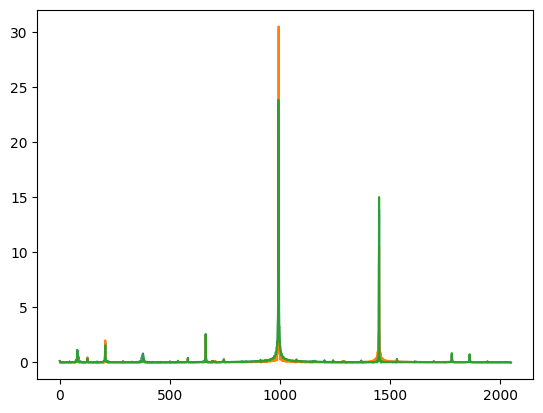

In [ ]:
plt.plot(arr_without[0])

In [25]:
def create_anomaly(df, start_idx, end_idx, mean, std):
    anomaly = np.random.normal(mean, std, end_idx - start_idx + 1)
    #df.replace(list(range(start_idx, end_idx + 1)), [anomaly])
    df.iloc[start_idx:end_idx+1, 0] += anomaly
    return df

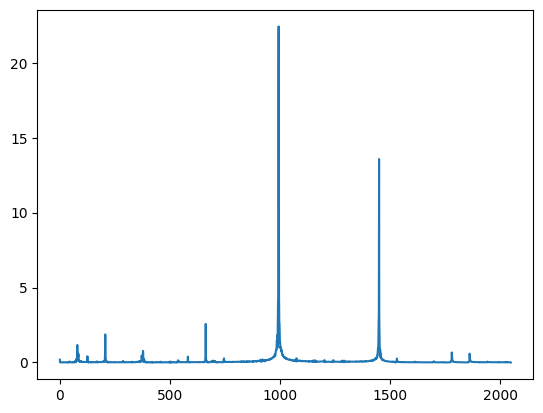

In [ ]:
plt.plot(array_data)

In [ ]:
array_data.head()

,1
1,0.183251
2,0.007082
3,0.008547
4,0.005702
5,0.009898


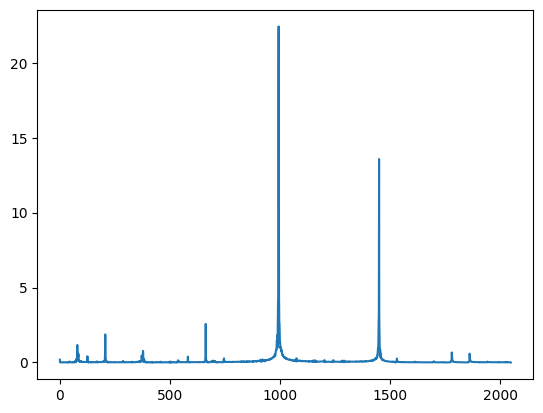

In [ ]:
array_data[1].mean()
plt.plot(create_anomaly(array_data, 30, 300, array_data[1].mean() + 5, array_data[1].std() + 2))
#create_anomaly(array_data, 30, 300, array_data[1].mean(), array_data[1].std()).head(40)


In [ ]:
data = json.load(open(all_files[0]))
array_data_0 = data['spectrum_chart']
array_data_0 = pd.DataFrame(array_data_0)
array_data_0 = array_data_0.drop(index = 0)
array_data_0 = array_data_0.drop([0], axis = 1)
array_data_0, freq = time_to_freq_transform(array_data_0, f_sampling = 1000) #преобразование Фурье
array_data_0 = pd.DataFrame(array_data_0)
array_data_0 = create_anomaly(array_data_0, 30, 300, array_data_0[0].mean() + 10, array_data_0[0].std()+5)
array_data_0[0].std()

21.715265370609288

In [24]:
def create_anomaly_2(df, start_idx, end_idx, mean, std):
    anomaly = mean
    #df.replace(list(range(start_idx, end_idx + 1)), [anomaly])
    df.iloc[start_idx:end_idx+1, 0] += anomaly
    return df


In [ ]:
import numpy as np

In [8]:
arr_with = []
for i in range(4500, 7000, 9):
    if all_files[i].endswith("B.json") and all_files[i + 3].endswith("B.json") and all_files[i + 6].endswith("B.json"):
        data_0 = json.load(open(all_files[i]))
        data_1 = json.load(open(all_files[i + 3]))
        data_2 = json.load(open(all_files[i + 6]))
        #print('start\n', all_files[i], '\n', all_files[i+1], '\n', all_files[i+2], 'end')

        array_data_0 = data_0['spectrum_chart']
        array_data_0 = pd.DataFrame(array_data_0)
        array_data_0 = array_data_0.drop(index = 0)
        array_data_0 = array_data_0.drop([0], axis = 1)
        #array_data_0, freq = time_to_freq_transform(array_data_0, f_sampling = 1000) #преобразование Фурье
        #array_data_0 = pd.DataFrame(array_data_0)

        array_data_0 = create_anomaly(array_data_0, 70, 150, array_data_0[1].mean() + 2, array_data_0[1].std()+1)

        array_data_1 = data_1['spectrum_chart']
        array_data_1 = pd.DataFrame(array_data_1)
        array_data_1 = array_data_1.drop(index = 0)
        array_data_1 = array_data_1.drop([0], axis = 1)
        #array_data_1, freq = time_to_freq_transform(array_data_1, f_sampling = 1000) # и здесь
        #array_data_1 = pd.DataFrame(array_data_1)

        #array_data_1 = create_anomaly(array_data_1, 70, 230, array_data_1[1].mean() + 10, array_data_1[1].std() + 5)

        array_data_2 = data_2['spectrum_chart']
        array_data_2 = pd.DataFrame(array_data_2)
        array_data_2 = array_data_2.drop(index = 0)
        array_data_2 = array_data_2.drop([0], axis = 1)
        #array_data_2, freq = time_to_freq_transform(array_data_2, f_sampling = 1000) # и тут
        #array_data_2 = pd.DataFrame(array_data_2)

        #array_data_2 = create_anomaly(array_data_2, 70, 230, array_data_2[1].mean() + 10, array_data_2[1].std() + 5)

        ans_data = pd.DataFrame()
        ans_data['A'] = array_data_0[1]
        ans_data['B'] = array_data_1[1]
        ans_data['C'] = array_data_2[1]

        arr_with.append(ans_data)

NameError: name 'create_anomaly' is not defined

In [ ]:
data_0 = json.load(open(all_files[6000]))
#data_1 = json.load(open(all_files[i + 1]))
#data_2 = json.load(open(all_files[i + 2]))
#print('start\n', all_files[i], '\n', all_files[i+1], '\n', all_files[i+2], 'end')

array_data_0 = data_0['spectrum_chart']
array_data_0 = pd.DataFrame(array_data_0)
array_data_0 = array_data_0.drop(index = 0)
array_data_0 = array_data_0.drop([0], axis = 1)
#array_data_0, freq = time_to_freq_transform(array_data_0, f_sampling = 1000) #преобразование Фурье
#array_data_0 = pd.DataFrame(array_data_0)
array_data = array_data_0
array_data_0 = create_anomaly_2(array_data_0, 370, 390, array_data_0[1].mean() + 2, array_data_0[1].std())

In [ ]:
array = array_data_0

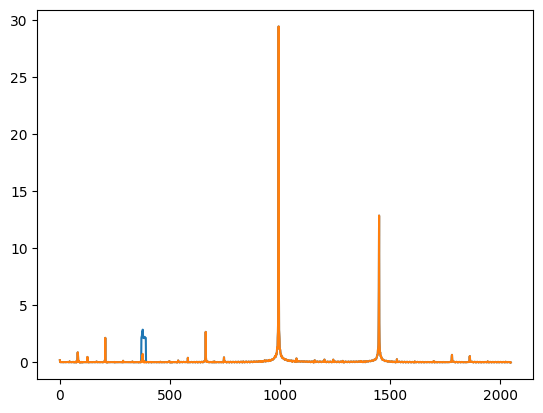

In [ ]:

plt.plot(array_data_0, label = 'sin')
plt.plot(array, label = 'cos')


In [ ]:
arr_with

In [ ]:
import zipfile

In [ ]:
output_folder = '/content/spectra_anomaly_only_C'
os.makedirs(output_folder, exist_ok=True)

# Преобразуем каждый датафрейм в CSV файл и сохраняем его
for idx, df in enumerate(arr_with):
    df.to_csv(f'{output_folder}/dataframe_{idx}.csv', index=False)

!zip -r /content/spectra_anomaly_only_C.zip /content/spectra_anomaly_only_C

# Скачать архив с CSV файлами
from google.colab import files
files.download("/content/spectra_anomaly_only_C.zip")

# Создаем архив из CSV файлов
'''
zip_filename = '/content/spectra_anomaly.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, _, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)
'''

  adding: content/spectra_anomaly_only_C/ (stored 0%)
  adding: content/spectra_anomaly_only_C/dataframe_43.csv (deflated 62%)
  adding: content/spectra_anomaly_only_C/dataframe_26.csv (deflated 58%)
  adding: content/spectra_anomaly_only_C/dataframe_20.csv (deflated 58%)
  adding: content/spectra_anomaly_only_C/dataframe_31.csv (deflated 61%)
  adding: content/spectra_anomaly_only_C/dataframe_42.csv (deflated 62%)
  adding: content/spectra_anomaly_only_C/dataframe_11.csv (deflated 58%)
  adding: content/spectra_anomaly_only_C/dataframe_39.csv (deflated 62%)
  adding: content/spectra_anomaly_only_C/dataframe_3.csv (deflated 58%)
  adding: content/spectra_anomaly_only_C/dataframe_25.csv (deflated 60%)
  adding: content/spectra_anomaly_only_C/dataframe_18.csv (deflated 58%)
  adding: content/spectra_anomaly_only_C/dataframe_38.csv (deflated 62%)
  adding: content/spectra_anomaly_only_C/dataframe_19.csv (deflated 58%)
  adding: content/spectra_anomaly_only_C/dataframe_33.csv (deflated 58%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

"\nzip_filename = '/content/spectra_anomaly.zip'\nwith zipfile.ZipFile(zip_filename, 'w') as zipf:\n    for root, _, files in os.walk(output_folder):\n        for file in files:\n            zipf.write(os.path.join(root, file), arcname=file)\n"

In [9]:
output_folder = '/content/spectra_without_anomaly_only_b'
os.makedirs(output_folder, exist_ok=True)

# Преобразуем каждый датафрейм в CSV файл и сохраняем его
for idx, df in enumerate(arr_without):
    df.to_csv(f'{output_folder}/dataframe_{idx}.csv', index=False)

# Создаем архив из CSV файлов
'''
zip_filename = '/content/spectra_without_anomaly.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, _, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

'''

"\nzip_filename = '/content/spectra_without_anomaly.zip'\nwith zipfile.ZipFile(zip_filename, 'w') as zipf:\n    for root, _, files in os.walk(output_folder):\n        for file in files:\n            zipf.write(os.path.join(root, file), arcname=file)\n\n"

In [ ]:
from google.colab import files

files.download(zip_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Архивировать папку с CSV файлами
!zip -r /content/spectra_without_anomaly_only_b.zip /content/spectra_without_anomaly_only_b

# Скачать архив с CSV файлами
from google.colab import files
files.download("/content/spectra_without_anomaly_only_b.zip")

  adding: content/spectra_without_anomaly_only_b/ (stored 0%)
  adding: content/spectra_without_anomaly_only_b/dataframe_93.csv (deflated 58%)
  adding: content/spectra_without_anomaly_only_b/dataframe_61.csv (deflated 59%)
  adding: content/spectra_without_anomaly_only_b/dataframe_127.csv (deflated 62%)
  adding: content/spectra_without_anomaly_only_b/dataframe_62.csv (deflated 59%)
  adding: content/spectra_without_anomaly_only_b/dataframe_53.csv (deflated 58%)
  adding: content/spectra_without_anomaly_only_b/dataframe_34.csv (deflated 58%)
  adding: content/spectra_without_anomaly_only_b/dataframe_65.csv (deflated 59%)
  adding: content/spectra_without_anomaly_only_b/dataframe_100.csv (deflated 58%)
  adding: content/spectra_without_anomaly_only_b/dataframe_0.csv (deflated 62%)
  adding: content/spectra_without_anomaly_only_b/dataframe_6.csv (deflated 60%)
  adding: content/spectra_without_anomaly_only_b/dataframe_94.csv (deflated 58%)
  adding: content/spectra_without_anomaly_only_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
f = open('/content/spectra_json/2023_06_04T00:14:37_2_A.json')

data = json.load(f)
data

{'spectrum_chart': [['freq', 'ampl'],
  [0, 0.18325111],
  [1, 0.0070821233],
  [2, 0.00854688],
  [3, 0.0057020234],
  [4, 0.009898074],
  [5, 0.006592665],
  [6, 0.010710399],
  [7, 0.010493727],
  [8, 0.011599481],
  [9, 0.01423762],
  [10, 0.003749403],
  [11, 0.0055151084],
  [12, 0.009043156],
  [13, 0.0032638125],
  [14, 0.009943144],
  [15, 0.0058707753],
  [16, 0.011857536],
  [17, 0.016776063],
  [18, 0.00892164],
  [19, 0.0071514454],
  [20, 0.010861141],
  [21, 0.0028944092],
  [22, 0.011467855],
  [23, 0.01254018],
  [24, 0.011569298],
  [25, 0.005441469],
  [26, 0.012777341],
  [27, 0.008941914],
  [28, 0.004552094],
  [29, 0.009072776],
  [30, 0.0042755106],
  [31, 0.014537995],
  [32, 0.00985591],
  [33, 0.0050596856],
  [34, 0.0062630377],
  [35, 0.007875834],
  [36, 0.015489464],
  [37, 0.031885363],
  [38, 0.0053839665],
  [39, 0.00458627],
  [40, 0.0143833],
  [41, 0.013309457],
  [42, 0.016363196],
  [43, 0.035177633],
  [44, 0.061579566],
  [45, 0.020004569],
  [4

In [ ]:
array_data = data['spectrum_chart']
array_data = pd.DataFrame(array_data)
array_data = array_data.drop(index = 0)
array_data = array_data.drop([0], axis = 1)
array_data

,1
1,0.183251
2,0.007082
3,0.008547
4,0.005702
5,0.009898
...,...
2044,0.015354
2045,0.015516
2046,0.015436
2047,0.016954


In [ ]:
array_data

,0,1
0,freq,ampl
1,0,0.183251
2,1,0.007082
3,2,0.008547
4,3,0.005702
...,...,...
2044,2043,0.015354
2045,2044,0.015516
2046,2045,0.015436
2047,2046,0.016954


In [ ]:
import json

In [ ]:
all_files

[]

In [6]:
data = pd.read_csv(all_files[10])
data = data['A']
data

0       0.109999
1       0.046737
2       0.047657
3       0.034844
4       0.058054
          ...   
2043    0.025368
2044    0.020137
2045    0.016254
2046    0.018802
2047    0.000000
Name: A, Length: 2048, dtype: float64

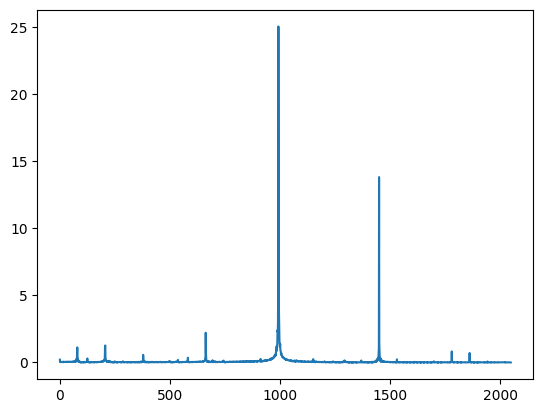

In [ ]:
plt.plot(data)

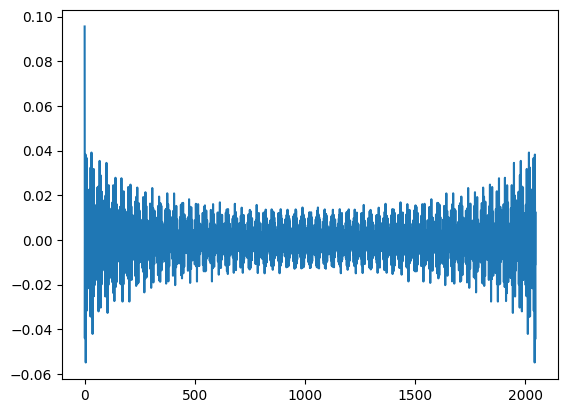

In [ ]:
s = np.fft.ifft(data)
plt.plot(s.real, label='real')

##Describe data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!unzip /content/spectra_without_anomaly_only_b.zip

Archive:  /content/spectra_without_anomaly_only_b.zip
   creating: content/spectra_without_anomaly_only_b/
  inflating: content/spectra_without_anomaly_only_b/dataframe_93.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_61.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_127.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_62.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_53.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_34.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_65.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_100.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_0.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_6.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_94.csv  
  inflating: content/spectra_without_anomaly_only_b/dataframe_105.csv  
  inflating: content/spectra_without_ano

In [117]:
!unzip /content/spectra_anomaly_only_Atsag122.zip
!unzip /content/spectra_anomaly_2_only_A1.zip
!unzip /content/spectra_without_anomaly_only_A192.zip
!unzip /content/spectra_anomaly_only_A1.zip

Archive:  /content/spectra_anomaly_only_A1.zip
   creating: content/spectra_anomaly_only_A1/
  inflating: content/spectra_anomaly_only_A1/dataframe_75.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_43.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_74.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_58.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_49.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_26.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_20.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_54.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_31.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_76.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_42.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_61.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_79.csv  
  inflating: content/spectra_anomaly_only_A1/dataframe_84.csv  
  inflating

In [118]:
path_to_data = '/content/content/spectra_anomaly_only_A1'
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))
list4 = [pd.read_csv(file,
                          sep=',',
                          parse_dates=True) for file in all_files]



In [130]:
path_to_data = '/content/content/spectra_without_anomaly_only_A192'
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))
list0 = [pd.read_csv(file,
                          sep=',',
                          parse_dates=True) for file in all_files]

list00 = []
list01 = []

for dataset in list0:
    dataset_copy1 = dataset.copy()
    dataset_copy1['anomaly1'] = 0
    list01.append(dataset_copy1)

    dataset_copy0 = dataset.copy()
    dataset_copy0['anomaly0'] = 0
    list00.append(dataset_copy0)


In [4]:
path_to_data = '/content/content/spectra_anomaly_2_only_A1'
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))
list2 = [pd.read_csv(file,
                          sep=',',
                          parse_dates=True) for file in all_files]
list20 = []
list21 = []

for dataset in list2:
    dataset_copy1 = dataset.copy()
    dataset_copy1['anomaly1'] = 1
    list21.append(dataset_copy1)

    dataset_copy0 = dataset.copy()
    dataset_copy0['anomaly0'] = 1
    list20.append(dataset_copy0)

In [5]:
path_to_data = '/content/content/spectra_anomaly_only_Atsag122'
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))
list1 = [pd.read_csv(file,
                          sep=',',
                          parse_dates=True) for file in all_files]
list10 = []
list11 = []

for dataset in list1:
    dataset_copy1 = dataset.copy()
    dataset_copy1['anomaly1'] = 0
    list11.append(dataset_copy1)

    dataset_copy0 = dataset.copy()
    dataset_copy0['anomaly0'] = 1
    list10.append(dataset_copy0)

In [124]:
list00[0]['A'].describe()

count    2048.000000
mean        0.117872
std         0.770182
min         0.000000
25%         0.020837
50%         0.032349
75%         0.062260
max        20.172815
Name: A, dtype: float64

In [123]:
list10[0]['A'].describe()

count    2048.000000
mean        0.122713
std         0.772770
min         0.001211
25%         0.023965
50%         0.034994
75%         0.063735
max        19.987013
Name: A, dtype: float64

In [140]:
augmented_timeseries.describe()

count    2048.000000
mean        0.120424
std         0.771788
min         0.000911
25%         0.017885
50%         0.037628
75%         0.064924
max        23.934622
Name: A, dtype: float64

In [126]:
list4[3]['A'].describe()

count    2048.000000
mean        0.107272
std         0.805380
min         0.000000
25%         0.015588
50%         0.033105
75%         0.056378
max        31.120104
Name: B, dtype: float64

In [106]:
data_0 = list00[10]
array_data_0 = data_0['A']
array_data = array_data_0
#create_anomaly_2(data_0['A'], 0, 29, data_0['A'].mean(), data_0['A'].std())
#array_data_0 = create_anomaly_2(array_data_0, 370, 390, array_data_0.mean() + 2, array_data_0.std())

<ipython-input-107-b5b3360d37d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_data_0.iloc[30:100+1] += array_data_0.mean() + 2


Text(0, 0.5, 'Amplitude')

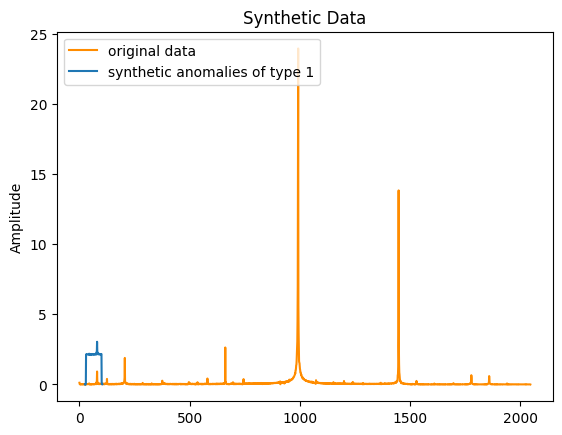

In [107]:
plt.plot(data_0['A'], color = 'darkorange', label = 'original data')
array_data_0.iloc[30:100+1] += array_data_0.mean() + 2
array_data = array_data_0[25:105]
plt.plot(array_data, label = 'synthetic anomalies of type 1')
plt.legend(loc="upper left")
plt.title("Synthetic Data")
#plt.xlabel("Length of list (number)")
plt.ylabel("Amplitude")



In [109]:
def create_anomalyff(df, start_idx, end_idx, mean, std):
    anomaly = np.random.normal(mean, std, end_idx - start_idx + 1)
    #df.replace(list(range(start_idx, end_idx + 1)), [anomaly])
    df.iloc[start_idx:end_idx+1] += anomaly
    return df

In [113]:
data_0 = list00[10]
array_data_0 = data_0['A']
array_data = array_data_0
#create_anomaly_2(data_0['A'], 0, 29, data_0['A'].mean(), data_0['A'].std())
array_data_0 = create_anomalyff(array_data_0, 30, 90, array_data_0.mean() + 2, array_data_0.std())

<ipython-input-109-996dec230412>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[start_idx:end_idx+1] += anomaly


<ipython-input-109-996dec230412>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[start_idx:end_idx+1] += anomaly


Text(0, 0.5, 'Amplitude')

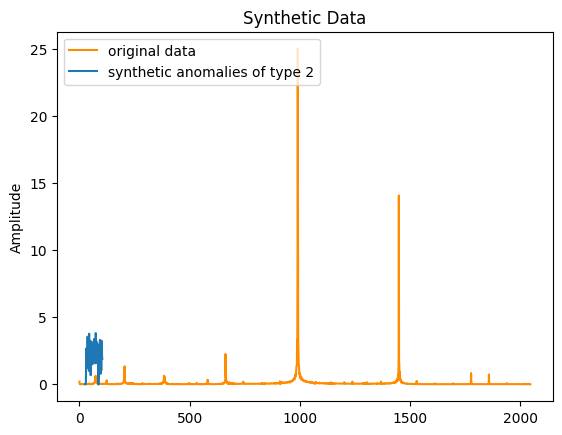

In [116]:
data_0 = list00[34]
array_data_0 = data_0['A']
array_data = array_data_0
plt.plot(data_0['A'], color = 'darkorange', label = 'original data')
#create_anomaly_2(data_0['A'], 0, 29, data_0['A'].mean(), data_0['A'].std())
array_data_0 = create_anomalyff(array_data_0, 30, 150, array_data_0.mean() + 2, array_data_0.std())
array_data = array_data_0[25:105]
plt.plot(array_data, label = 'synthetic anomalies of type 2')
plt.legend(loc="upper left")
plt.title("Synthetic Data")
#plt.xlabel("Length of list (number)")
plt.ylabel("Amplitude")

##Generation

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class BaseAnomaly:
    def __init__(self, template, *args, **kwargs):
        self.template = pd.Series(template).copy()
        self.anomaly = template.copy()
        self.transformations = args
        if args:
            self.parameters = args
        else:
            self.parameters = kwargs
        self.__dict__.update(**kwargs)
        self.anomaly = self._generate()

    def insert(self, timeseries, index=None):
        anomaly = self.anomaly
        if index is not None:
            timeseries = pd.concat([timeseries.iloc[:index],
                                    pd.Series(anomaly),
                                    timeseries.iloc[index:]], ignore_index=True)

        else:
            timeseries = pd.concat([pd.Series(anomaly), timeseries], ignore_index=True)
        return timeseries

    def plot(self):
        n = len(self.template)
        combined = pd.concat([self.template, self.anomaly], ignore_index=True)
        plt.title(self.__str__())
        plt.plot(combined[:n])
        plt.plot(combined[n:], c='r')
        plt.show()

    def _generate(self):
        return None
    def __str__(self):
        return self.__class__.__name__+' - ' + str(self.parameters)
    def __repr__(self):
        return self.__str__()


class NoisyAnomaly(BaseAnomaly):
    """Create a synthetic anomaly augmented by noise.

    E.g.

    noisy_anomaly = NoisyAnomaly(template, mu=0, sigma=5)
    noisy_anomaly.plot()
    augmented_timeseries = noisy_anomaly.insert(ts, index=None)
    """

    def __init__(self, template, mu=0, sigma=1):
        """
        Args:

        template - template timeseries to augment
        mu - mean, modelling normal distribution of noise
        sigma - sigma, modelling normal distribution of noise
        """

        super().__init__(template, mu=mu, sigma=sigma)
    def _generate(self):
        anomaly = self.template.copy()
        noise = np.random.normal(self.mu, self.sigma, len(anomaly))
        return anomaly + noise


class RangeShiftAnomaly(BaseAnomaly):
    """Create a synthetic anomaly augmented by a range shift (max-min).

    E.g.

    rangeshift_anomaly = RangeShiftAnomaly(template, ratio=1/3)
    rangeshift_anomaly.plot()
    augmented_timeseries = rangeshift_anomaly.insert(timeseries, index=None)
    """

    def __init__(self, template, ratio):
        """
        Args:
        template - template timeseries to augment
        ratio - fraction of original range to scale to
        """

        super().__init__(template, ratio=ratio)
    def _generate(self):
        anomaly = self.template.copy()
        return anomaly * self.ratio


class AmplitudeShiftAnomaly(BaseAnomaly):
    """Create a synthetic anomaly augmented by an amplitude shift (raw value).
    """

    def __init__(self, template, ratio):
        """
        Args:

        template - template timeseries to augment
        ratio - fraction of original range to translate to
        """

        super().__init__(template, ratio=ratio)
    def _generate(self):
        _max = self.template.max()
        _min = self.template.min()
        _shift = (_max-_min) * self.ratio
        anomaly = self.template.copy()
        return anomaly + _shift


class PointAnomaly(BaseAnomaly):
    """Create a synthetic anomaly augmented by points outside of the boundaries.
    Note:

    Anomalous points generate alternate between upper and lower boundaries.
    i.e. Given template timeseries [11, 12, ..., 20], following points generated:
        [22, 8, 23, 7, 22, 9, ...]

    E.g.

    point_anomaly = PointAnomaly(template, ratio=1/2, mu=0, sigma=10, count=100)
    point_anomaly.plot()
    augmented_timeseries = point_anomaly.insert(timeseries, index=None)
    """

    def __init__(self, template, ratio=1/3, mu=0, sigma=1, count=1):
        """
        Args:

        template - template timeseries to augment
        ratio - fraction of original range as threshold that points must exceed
        mu - mean, modelling normal distribution of noise
        sigma - sigma, modelling normal distribution of noise
        count - no. of point anomalies to generate
        """

        super().__init__(template, ratio=ratio, mu=mu, sigma=sigma, count=count)
    def _generate(self):
        _max = self.template.max()
        _min = self.template.min()
        _mid = (_max-_min) * self.ratio
        _upper = _max + _mid
        _lower = _min - _mid
        point = pd.Series([_upper, _lower])
        anomaly = pd.Series([])
        for i in range(self.count):
            noise = np.random.normal(self.mu, self.sigma, 2)
            point_anomaly = point + noise
            anomaly = anomaly.append(point_anomaly, ignore_index=True)
        return anomaly
    def plot(self):
        n = len(self.template)
        combined = pd.concat([self.template, self.anomaly], ignore_index=True)
        plt.title(self.__str__())
        plt.plot(combined[:n])
        plt.plot(combined[n:], '.', c='r')
        plt.show()


class FrequencyShiftAnomaly(BaseAnomaly):
    """Create a synthetic anomaly augmented by frequency shift.

    E.g.
    """

    def __init__(self, template, ratio):
        """
        Args:
        template - template timeseries to augment
        ratio - (0-1), fraction of original length of timeseries to generate
        """

        super().__init__(template, ratio=ratio)
    def _generate(self):
        if 0 < self.ratio <= 1:
            _ratio = int(1/self.ratio)
            frag = self.template.iloc[::_ratio].reset_index(drop=True)
        else:
            # TODO: Accept >1
            raise NotImplementedError("FrequencyShiftAnomaly 'ratio' accepts only values between >0 and <=1.")
        return frag


class CompoundAnomaly(BaseAnomaly):
    """Create a compound anomaly of multiple anomaly shifts.

    E.g.
    args = [
        # [Generator, {Arguments}],
        [FrequencyShiftAnomaly, {'ratio': 1/3}],
        [AmplitudeShiftAnomaly, {'ratio': 1/3}],
        [RangeShiftAnomaly, {'ratio': 1/2}],
    ]
    compound_anomaly = CompoundAnomaly(template, *args)
    compound_anomaly.plot()
    compound_anomaly.insert(timeseries, index=None)
    """

    def __init__(self, template, *args):
        super().__init__(template, *args)
    def _generate(self):
        anomaly = self.anomaly.copy()
        for Anomaly, kwargs in self.transformations:
            anomaly = Anomaly(anomaly, **kwargs).anomaly
        return anomaly
    def __str__(self):
        print_string = str([Anomaly.__name__ for Anomaly, _ in self.transformations])
        return self.__class__.__name__ + ' - ' + str(print_string)

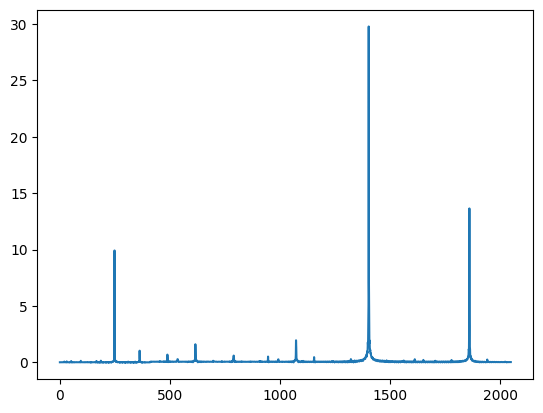

In [30]:
augmented_timeseries_0 = compound_anomaly_0.insert(array_data_0, index=None)
plt.plot(augmented_timeseries_0)

In [22]:
args = [
    # [Generator, {Arguments}],
    [FrequencyShiftAnomaly, {'ratio': 1/4}],
    [AmplitudeShiftAnomaly, {'ratio': 0}],
    [RangeShiftAnomaly, {'ratio': 1/5}],
]
arr_with = []
for i in range(4501, 7054, 9):
    if all_files[i].endswith("B.json") and all_files[i + 3].endswith("B.json") and all_files[i + 6].endswith("B.json"):
        data_0 = json.load(open(all_files[i]))
        data_1 = json.load(open(all_files[i + 3]))
        data_2 = json.load(open(all_files[i + 6]))
        print('start\n', all_files[i], '\n', all_files[i+3], '\n', all_files[i+6], 'end')

        array_data_0 = data_0['spectrum_chart']
        array_data_0 = pd.DataFrame(array_data_0)
        array_data_0 = array_data_0.drop(index = 0)
        array_data_0 = array_data_0.drop([0], axis = 1)
        array_data_0 = array_data_0[:1638]
        array_data_0 = array_data_0[1].copy()

        compound_anomaly_0 = CompoundAnomaly(array_data_0, *args)
        print(type(compound_anomaly_0))
        augmented_timeseries_0 = compound_anomaly_0.insert(array_data_0, index=None)

        #array_data_0, freq = time_to_freq_transform(array_data_0, f_sampling = 1000) #преобразование Фурье

        array_data_1 = data_1['spectrum_chart']
        array_data_1 = pd.DataFrame(array_data_1)
        array_data_1 = array_data_1.drop(index = 0)
        array_data_1 = array_data_1.drop([0], axis = 1)
        array_data_1 = array_data_1[:1638]
        array_data_1 = array_data_1[1].copy()
        compound_anomaly_1 = CompoundAnomaly(array_data_1, *args)
        augmented_timeseries_1 = compound_anomaly_1.insert(array_data_1, index=None)
        #array_data_1, freq = time_to_freq_transform(array_data_1, f_sampling = 1000) # и здесь

        array_data_2 = data_2['spectrum_chart']
        array_data_2 = pd.DataFrame(array_data_2)
        array_data_2 = array_data_2.drop(index = 0)
        array_data_2 = array_data_2.drop([0], axis = 1)
        array_data_2 = array_data_2[:1638]
        array_data_2 = array_data_2[1].copy()
        compound_anomaly_2 = CompoundAnomaly(array_data_2, *args)
        augmented_timeseries_2 = compound_anomaly_2.insert(array_data_2, index=None)
        #array_data_2, freq = time_to_freq_transform(array_data_2, f_sampling = 1000) # и тут

        ans_data = pd.DataFrame()
        ans_data['A'] = augmented_timeseries_0
        ans_data['B'] = augmented_timeseries_1
        ans_data['C'] = augmented_timeseries_2

        arr_with.append(ans_data)







start
 /content/spectra_json/2023_06_09T20:41:03_3_B.json 
 /content/spectra_json/2023_06_09T20:44:37_2_B.json 
 /content/spectra_json/2023_06_09T20:51:03_3_B.json end
<class '__main__.CompoundAnomaly'>
start
 /content/spectra_json/2023_06_09T20:54:37_2_B.json 
 /content/spectra_json/2023_06_09T21:01:03_3_B.json 
 /content/spectra_json/2023_06_09T21:04:37_2_B.json end
<class '__main__.CompoundAnomaly'>
start
 /content/spectra_json/2023_06_09T21:11:03_3_B.json 
 /content/spectra_json/2023_06_09T21:14:37_2_B.json 
 /content/spectra_json/2023_06_09T21:21:03_3_B.json end
<class '__main__.CompoundAnomaly'>
start
 /content/spectra_json/2023_06_09T21:24:37_2_B.json 
 /content/spectra_json/2023_06_09T21:31:03_3_B.json 
 /content/spectra_json/2023_06_09T21:34:37_2_B.json end
<class '__main__.CompoundAnomaly'>
start
 /content/spectra_json/2023_06_09T21:41:03_3_B.json 
 /content/spectra_json/2023_06_09T21:44:37_2_B.json 
 /content/spectra_json/2023_06_09T21:51:03_3_B.json end
<class '__main__.Com

In [23]:
len(arr_with)

122

In [24]:
output_folder = '/content/spectra_anomaly_only_btsag1'
os.makedirs(output_folder, exist_ok=True)

# Преобразуем каждый датафрейм в CSV файл и сохраняем его
for idx, df in enumerate(arr_with):
    df.to_csv(f'{output_folder}/dataframe_{idx}.csv', index=False)

!zip -r /content/spectra_anomaly_only_btsag1.zip /content/spectra_anomaly_only_btsag1

# Скачать архив с CSV файлами
from google.colab import files
files.download("/content/spectra_anomaly_only_btsag1.zip")

  adding: content/spectra_anomaly_only_btsag1/ (stored 0%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_93.csv (deflated 60%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_61.csv (deflated 60%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_62.csv (deflated 61%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_53.csv (deflated 60%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_34.csv (deflated 61%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_65.csv (deflated 61%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_100.csv (deflated 61%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_0.csv (deflated 59%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_6.csv (deflated 60%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_94.csv (deflated 61%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_105.csv (deflated 63%)
  adding: content/spectra_anomaly_only_btsag1/dataframe_118.csv (deflated 61%)
  ad

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import pandas as pd

In [12]:
args = [
    # [Generator, {Arguments}],
    [FrequencyShiftAnomaly, {'ratio': 1/4}],
    [AmplitudeShiftAnomaly, {'ratio': 0}],
    [RangeShiftAnomaly, {'ratio': 1/4}],
]
data_0 = json.load(open(all_files[0]))
data_1 = json.load(open(all_files[0 + 3]))
data_2 = json.load(open(all_files[0 + 6]))
#('start\n', all_files[i], '\n', all_files[i+3], '\n', all_files[i+6], 'end')

array_data_0 = data_0['spectrum_chart']
array_data_0 = pd.DataFrame(array_data_0)
array_data_0 = array_data_0.drop(index = 0)
array_data_0 = array_data_0.drop([0], axis = 1)
array_data_0 = array_data_0[1].copy()
compound_anomaly_0 = CompoundAnomaly(array_data_0, *args)
augmented_timeseries_0 = compound_anomaly_0.insert(array_data_0, index=None)

In [ ]:
!git clone https://github.com/AprilCal/TSAGen.git
%cd TSAGen
!pip install -r requirements.txt
!python setup.py install

Cloning into 'TSAGen'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 160 (delta 57), reused 111 (delta 21), pack-reused 0
Receiving objects: 100% (160/160), 838.98 KiB | 13.32 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/TSAGen
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 22.5 MB/s eta 0:00:00
ERROR: Could not find a versi

In [ ]:
from platform import python_version
python_version()

'3.10.12'

In [ ]:
!pip install matlab

  Preparing metadata (setup.py) ... done
  Created wheel for matlab: filename=matlab-0.1-py3-none-any.whl size=1156 sha256=b857a83b13ef30467b6a97eda4680273df2e470ee22ab60be16eb0d0667a74a1
  Stored in directory: /root/.cache/pip/wheels/d1/d3/76/5314058ee22e7957a18eec0291788462f1df178bb08223bdd2
Successfully built matlab


In [7]:
!pip install tsag

  Preparing metadata (setup.py) ... done
  Created wheel for tsag: filename=tsag-0.1-py3-none-any.whl size=3168 sha256=f9ea068fa1c4aa61e22390a9d4dbe3f1d1890c80553a2cf4ef082b3b56ca5a67
  Stored in directory: /root/.cache/pip/wheels/f8/35/6b/7d465aac4b2ce09157beb8043d6de4e013ada0abf435285d4e
Successfully built tsag


In [24]:
from tsag import FrequencyShiftAnomaly, AmplitudeShiftAnomaly, RangeShiftAnomaly, CompoundAnomaly

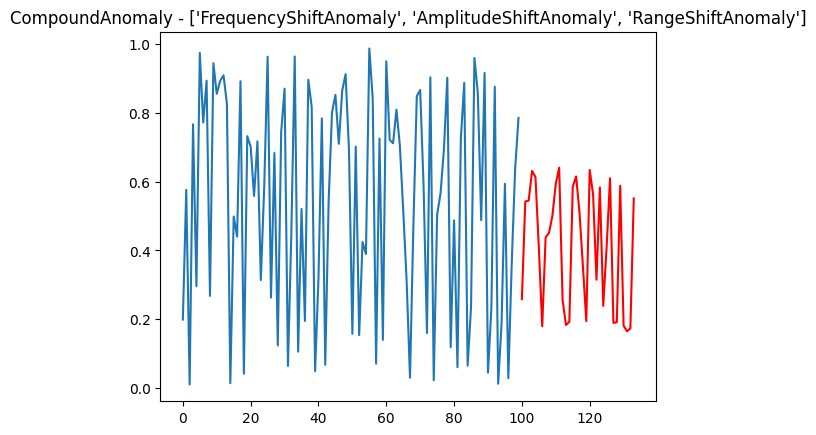

In [5]:
from tsag import FrequencyShiftAnomaly, AmplitudeShiftAnomaly, RangeShiftAnomaly, CompoundAnomaly
# Create a reference template time series
n = 100
template = pd.Series(np.random.rand(n))
args = [
    # [Generator, {Arguments}],
    [FrequencyShiftAnomaly, {'ratio': 1/3}],
    [AmplitudeShiftAnomaly, {'ratio': 1/3}],
    [RangeShiftAnomaly, {'ratio': 1/2}],
]

# Generate compound anomaly
compound_anomaly = CompoundAnomaly(template, *args)
compound_anomaly.plot()

# Insert generated anomaly into time series data
augmented_timeseries = compound_anomaly.insert(template, index=None)

In [131]:
data = list00[10]
data = data['A']
data

0       0.122138
1       0.035943
2       0.014365
3       0.020212
4       0.038761
          ...   
2043    0.004916
2044    0.009595
2045    0.005767
2046    0.006773
2047    0.000000
Name: A, Length: 2048, dtype: float64

In [16]:
import matplotlib.pyplot as plt

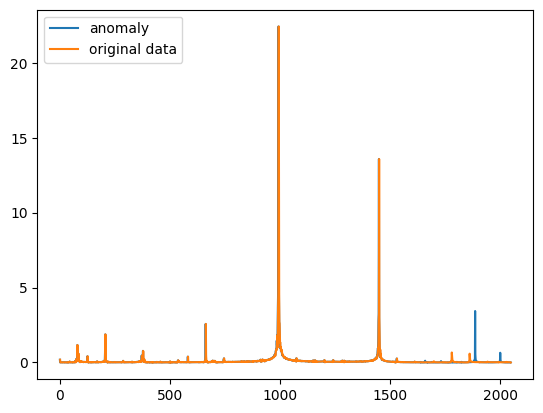

In [25]:
data_0 = json.load(open(all_files[0]))
data_1 = json.load(open(all_files[0 + 3]))
data_2 = json.load(open(all_files[0 + 6]))

array_data_0 = data_0['spectrum_chart']
array_data_0 = pd.DataFrame(array_data_0)
array_data_0 = array_data_0.drop(index = 0)
array_data_0 = array_data_0.drop([0], axis = 1)
array_data_0 = array_data_0[1].copy()
n = 100
template = array_data_0[:1638]
args = [
    # [Generator, {Arguments}],
    [FrequencyShiftAnomaly, {'ratio': 1/4}],
    [AmplitudeShiftAnomaly, {'ratio': 0}],
    [RangeShiftAnomaly, {'ratio': 1/5}],
]

# Generate compound anomaly
compound_anomaly = CompoundAnomaly(template, *args)

# Insert generated anomaly into time series data
augmented_timeseries = compound_anomaly.insert(template, index=None)
plt.plot(augmented_timeseries, label = 'anomaly')
plt.plot(array_data_0, label = 'original data')
plt.legend(loc="upper left")

Text(0, 0.5, 'Amplitude')

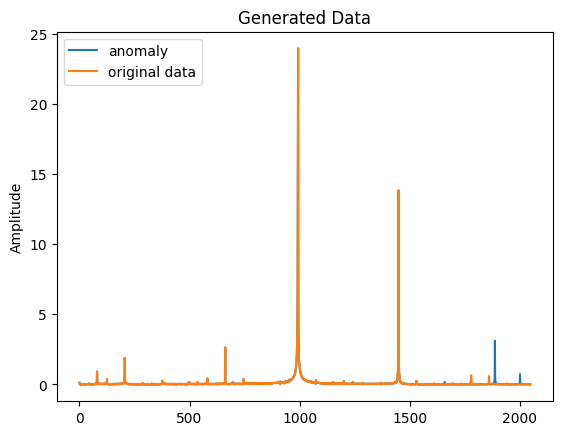

In [135]:
plt.plot(augmented_timeseries, label = 'anomaly')
plt.plot(data, label = 'original data')
plt.legend(loc="upper left")
plt.title("Generated Data")
#plt.xlabel("Length of list (number)")
plt.ylabel("Amplitude")

In [ ]:
!python TSAGen.py -h
!python TSAGen.py --mode=m --meta='./meta_features.yaml'

Traceback (most recent call last):
  File "/content/TSAGen/TSAGen.py", line 13, in <module>
    import generator.noise_generator as ng
  File "/content/TSAGen/generator/noise_generator.py", line 8, in <module>
    import matlab.engine
ModuleNotFoundError: No module named 'matlab.engine'; 'matlab' is not a package
Traceback (most recent call last):
  File "/content/TSAGen/TSAGen.py", line 13, in <module>
    import generator.noise_generator as ng
  File "/content/TSAGen/generator/noise_generator.py", line 8, in <module>
    import matlab.engine
ModuleNotFoundError: No module named 'matlab.engine'; 'matlab' is not a package


In [ ]:
import generator.trend_generator as tg
import generator.noise_generator as ng
import generator.season_generator as sg

ModuleNotFoundError: No module named 'matlab.engine'; 'matlab' is not a package

In [ ]:
# Choose the generator for season, noise, and trend component, respectively.
season_generator = sg.NormalSeasonGenerator(10,10,200,drift_a=0,drift_f=0,forking_depth=7)
noise_generator = ng.Gaussian()
trend_generator = tg.TrendGenerator()

# Control the noise component as a variable.
season = season_generator.gen_season()
length = len(season[0])
noise = [noise_generator.gen(0,sigma,length) for sigma in np.linspace(0.5,2,100)]
trend = trend_generator.gen(0,0,length)

# Assemble components.
assembler = assem.AssemblerWithAdditiveAnomalyInjector_v1(season,noise,trend,'noise',10e-7,0.2,a_type='beat')
assembler.assemble()

NameError: name 'sg' is not defined